# Transfer studies

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

from pipoli.core import Dimension

In [2]:
DATA = Path() / "output" / "data" / "data-naive-non-similar-'m'-'L'-'g'-geom-(0.1, 10)-(0.1, 10)-(1, 1)-10-10-1.pkl.gz"

In [3]:
all_data = pd.read_pickle(DATA)

In [4]:
BASE = all_data.attrs["base"]
all_data.attrs

{'base': ['m', 'L', 'g'],
 'space': 'geom',
 'range_1': (0.1, 10),
 'range_2': (0.1, 10),
 'range_3': (1, 1),
 'num_1': 10,
 'num_2': 10,
 'num_3': 1,
 'nb_eval_episodes': 10,
 'observations_shape': '(nb_episodes, nb_steps, 17)',
 'actions_shape': '(nb_episodes, nb_steps, 6)',
 'rewards_shape': '(nb_episodes, nb_steps)',
 'infos_shape': '(nb_episodes, nb_steps)',
 'policy_info': {'repo_id': 'farama-minari/HalfCheetah-v5-TQC-expert',
  'filename': 'halfcheetah-v5-TQC-expert.zip',
  'commit': '995505a'},
 'env': 'HalfCheetah-v5',
 'comment': "env has custom xml_file, forward_reward_weight and ctrl_cost_weight supplied by the context\nto make the reward function of the env dimensionally homogeneous, it is assumed that the weight's dimensions are such that [reward] = 1\ncontexts are not similar\nthe policy was not scaled (naive transfer)"}

## Similar transfer study

### Data processing

In [5]:
BASE_DIMENSIONS = [
    M := Dimension([1, 0, 0]),
    L := Dimension([0, 1, 0]),
    T := Dimension([0, 0, 1]),
]
Unit = Dimension([0, 0, 0])

In [6]:
process_df = all_data[["context", "b1", "b2", "b3", "infos"]].sort_values(["b1", "b2", "b3"])

In [7]:
process_df

,context,b1,b2,b3,infos
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.050000,9.81,"[[{'x_position': 0.08927178853269402, 'x_veloc..."
cheetah-m-L-g_1.400e+00_8.341e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.083405,9.81,"[[{'x_position': 0.1526236530382006, 'x_veloci..."
cheetah-m-L-g_1.400e+00_1.391e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.139128,9.81,"[[{'x_position': -0.028612293658902364, 'x_vel..."
cheetah-m-L-g_1.400e+00_2.321e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.232079,9.81,"[[{'x_position': -0.13231056507558872, 'x_velo..."
cheetah-m-L-g_1.400e+00_3.871e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.387132,9.81,"[[{'x_position': -0.01412297273914202, 'x_velo..."
...,...,...,...,...,...
cheetah-m-L-g_1.400e+02_6.458e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,0.645775,9.81,"[[{'x_position': -0.0922816098087395, 'x_veloc..."
cheetah-m-L-g_1.400e+02_1.077e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,1.077217,9.81,"[[{'x_position': 0.02116774753067123, 'x_veloc..."
cheetah-m-L-g_1.400e+02_1.797e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,1.796907,9.81,"[[{'x_position': 0.035935592660805794, 'x_velo..."
cheetah-m-L-g_1.400e+02_2.997e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,2.997421,9.81,"[[{'x_position': 0.08614656617513303, 'x_veloc..."


In [8]:
original_context = process_df["context"].loc["original"]

process_df["adimensional_distance_to_original"] = process_df["context"].map(lambda c: c.adimensional_distance(original_context, BASE))
process_df["cosine_similarity_to_original"] = process_df["context"].map(lambda c: c.cosine_similarity(original_context))
process_df["rewards_forward"] = process_df["infos"].map(np.vectorize(lambda infos: infos["reward_forward"]))
process_df["rewards_ctrl"] = process_df["infos"].map(np.vectorize(lambda infos: infos["reward_ctrl"]))
process_df["totals_reward_forward"] = process_df["rewards_forward"].map(lambda r: r.sum(axis=1))
process_df["totals_reward_ctrl"] = process_df["rewards_ctrl"].map(lambda r: r.sum(axis=1))
process_df["totals_reward"] = process_df.apply(lambda row: row["totals_reward_forward"] + row["totals_reward_ctrl"], axis=1)
process_df["mean_total_reward_forward"] = process_df["totals_reward_forward"].map(np.mean)
process_df["mean_total_reward_ctrl"] = process_df["totals_reward_ctrl"].map(np.mean)
process_df["mean_total_reward"] = process_df["totals_reward"].map(np.mean)
process_df["std_total_reward_forward"] = process_df["totals_reward_forward"].map(np.std)
process_df["std_total_reward_ctrl"] = process_df["totals_reward_ctrl"].map(np.std)
process_df["std_total_reward"] = process_df["totals_reward"].map(np.std)
process_df["mean_total_reward_difference"] = process_df["mean_total_reward"] - process_df["mean_total_reward"].loc["original"]

In [9]:
process_df

,context,b1,b2,b3,infos,adimensional_distance_to_original,cosine_similarity_to_original,rewards_forward,rewards_ctrl,totals_reward_forward,totals_reward_ctrl,totals_reward,mean_total_reward_forward,mean_total_reward_ctrl,mean_total_reward,std_total_reward_forward,std_total_reward_ctrl,std_total_reward,mean_total_reward_difference
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.050000,9.81,"[[{'x_position': 0.08927178853269402, 'x_veloc...",7.648866e+02,0.999488,"[[1.4756817900037407, 1.4965789104016824, 0.50...","[[-0.3983028411865235, -0.5043427467346192, -0...","[83.84964231183622, 251.7528019959054, 26.8642...","[-49.121527896821505, -54.97534660734237, -591...","[34.728114415014716, 196.77745538856303, -564....",87.077078,-161.290723,-74.213645,89.290977,215.236155,277.378339,-17712.392337
cheetah-m-L-g_1.400e+00_8.341e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.083405,9.81,"[[{'x_position': 0.1526236530382006, 'x_veloci...",5.873969e+02,0.999488,"[[1.1859284217249622, 1.9595155796762158, 0.08...","[[-0.29885296821594237, -0.5167149066925049, -...","[46.0910796065898, 74.66019744669286, 69.01617...","[-44.71651707291603, -46.92508972622454, -50.0...","[1.3745625336737746, 27.73510772046832, 18.919...",64.212275,-97.829942,-33.617668,44.020171,166.926767,168.228260,-17671.796359
cheetah-m-L-g_1.400e+00_1.391e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.139128,9.81,"[[{'x_position': -0.028612293658902364, 'x_vel...",5.137525e+02,0.999488,"[[0.01892787741008005, 0.35184353571579297, -0...","[[-0.36684679985046387, -0.4731931209564209, -...","[160.54704198389052, 38.79474452238573, 183.83...","[-55.17686722911894, -43.36311519294977, -42.5...","[105.37017475477158, -4.568370670564043, 141.2...",40.536840,-96.475494,-55.938654,79.313897,165.793384,188.902532,-17694.117346
cheetah-m-L-g_1.400e+00_2.321e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.232079,9.81,"[[{'x_position': -0.13231056507558872, 'x_velo...",4.854383e+02,0.999488,"[[-1.6802467403171173, -0.2991146720537874, -1...","[[-0.3977038860321045, -0.4674731731414795, -0...","[-32.2367144442377, -13.508088314472692, -82.3...","[-597.7925526618956, -30.555484099127348, -597...","[-630.0292671061333, -44.06357241360004, -680....",-22.963781,-200.105427,-223.069208,27.042494,260.550598,278.445099,-17861.247899
cheetah-m-L-g_1.400e+00_3.871e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.387132,9.81,"[[{'x_position': -0.01412297273914202, 'x_velo...",4.737575e+02,0.999489,"[[-1.133047239177611, -0.4400381200549786, 0.7...","[[-0.26619839668273926, -0.26377520561218265, ...","[22.457663876896657, -81.15464601003882, -57.6...","[-596.816494655609, -20.923241643607618, -37.0...","[-574.3588307787123, -102.07788765364643, -94....",42.973513,-206.839567,-163.866053,145.602589,255.262846,288.709530,-17802.044745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cheetah-m-L-g_1.400e+02_6.458e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,0.645775,9.81,"[[{'x_position': -0.0922816098087395, 'x_veloc...",7.818887e+04,0.953529,"[[-0.1635953720061198, -0.2401025129504017, -0...","[[-0.3413474798202515, -0.4166286945343018, -0...","[-1.7978442418670144, -1.0107261844322517, 0.9...","[-420.9963454723358, -421.71556997299194, -421...","[-422.79418971420284, -422.7262961574242, -420...",0.051310,-421.296312,-421.245002,1.104234,0.272769,1.090045,-18059.423693
cheetah-m-L-g_1.400e+02_1.077e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,1.077217,9.81,"[[{'x_position': 0.02116774753067123, 'x_veloc...",2.184058e+05,0.953528,"[[0.04772033763794287, -0.038291228340987526, ...","[[-0.2536807060241699, -0.3432704210281372, -0...","[-14.66112506918971, -17.64118984106645, -1.93...","[-587.0399318456648, -580.178861927986, -592.8...","[-601.7010569148545, -597.82

In [10]:
score_df = process_df[["b1", "b2", "b3", "adimensional_distance_to_original", "cosine_similarity_to_original", "mean_total_reward", "std_total_reward", "mean_total_reward_forward", "std_total_reward_forward", "mean_total_reward_ctrl", "std_total_reward_ctrl"]].rename(columns=dict(zip(["b1", "b2", "b3"], BASE)))

### Visualization

In [11]:
def heatmap(df, x, y, C, /, title=None, xlabel=None, ylabel=None, zlabel=None, xscale="log", yscale="log", **kwargs):
    xs = np.array(df[x])
    ys = np.array(df[y])
    Cs = np.array(df[C])

    Nx = np.sqrt(xs.size).astype(int)
    Ny = np.sqrt(ys.size).astype(int)
    X = xs.reshape((Nx, Ny))
    Y = ys.reshape((Nx, Ny))
    Z = Cs.reshape((Nx, Ny))

    plt.figure()
    plt.pcolormesh(X, Y, Z, **kwargs)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title or "")
    plt.xlabel(xlabel or x)
    plt.ylabel(ylabel or y)
    plt.colorbar(label=zlabel or C)

In [12]:
score_df

,m,L,g,adimensional_distance_to_original,cosine_similarity_to_original,mean_total_reward,std_total_reward,mean_total_reward_forward,std_total_reward_forward,mean_total_reward_ctrl,std_total_reward_ctrl
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00,1.4,0.050000,9.81,7.648866e+02,0.999488,-74.213645,277.378339,87.077078,89.290977,-161.290723,215.236155
cheetah-m-L-g_1.400e+00_8.341e-02_9.810e+00,1.4,0.083405,9.81,5.873969e+02,0.999488,-33.617668,168.228260,64.212275,44.020171,-97.829942,166.926767
cheetah-m-L-g_1.400e+00_1.391e-01_9.810e+00,1.4,0.139128,9.81,5.137525e+02,0.999488,-55.938654,188.902532,40.536840,79.313897,-96.475494,165.793384
cheetah-m-L-g_1.400e+00_2.321e-01_9.810e+00,1.4,0.232079,9.81,4.854383e+02,0.999488,-223.069208,278.445099,-22.963781,27.042494,-200.105427,260.550598
cheetah-m-L-g_1.400e+00_3.871e-01_9.810e+00,1.4,0.387132,9.81,4.737575e+02,0.999489,-163.866053,288.709530,42.973513,145.602589,-206.839567,255.262846
...,...,...,...,...,...,...,...,...,...,...,...
cheetah-m-L-g_1.400e+02_6.458e-01_9.810e+00,140.0,0.645775,9.81,7.818887e+04,0.953529,-421.245002,1.090045,0.051310,1.104234,-421.296312,0.272769
cheetah-m-L-g_1.400e+02_1.077e+00_9.810e+00,140.0,1.077217,9.81,2.184058e+05,0.953528,-595.833510,12.589461,-15.654179,5.945225,-580.179331,12.138158
cheetah-m-L-g_1.400e+02_1.797e+00_9.810e+00,140.0,1.796907,9.81,6.085676e+05,0.953525,-589.849352,7.981516,-5.979557,3.992256,-583.869795,4.932610
cheetah-m-L-g_1.400e+02_2.997e+00_9.810e+00,140.0,2.997421,9.81,1.694216e+06,0.953513,-562.413006,3.507869,-8.327333,3.738555,-554.085672,1.438156


In [13]:
score_df.loc["original"]

m                                       14.000000
L                                        0.500000
g                                        9.810000
adimensional_distance_to_original        0.000000
cosine_similarity_to_original            1.000000
mean_total_reward                    17638.178691
std_total_reward                        43.702724
mean_total_reward_forward            18006.789911
std_total_reward_forward                43.767684
mean_total_reward_ctrl                -368.611219
std_total_reward_ctrl                    0.364400
Name: original, dtype: float64

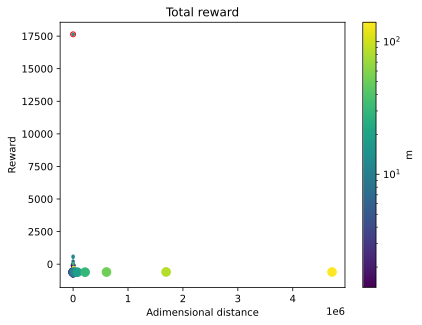

In [14]:
viz_df = score_df.sort_values(["adimensional_distance_to_original"])

viz_df.plot.scatter(
    x="adimensional_distance_to_original",
    y="mean_total_reward",
    s=viz_df["L"]*15,
    c="m",
    xlabel="Adimensional distance",
    ylabel="Reward",
    title="Total reward",
    legend=False,
    # cmap="coolwarm",
    norm="log", #colors.CenteredNorm(vcenter=original_context.value("m"))
    # logx=True,
)
plt.scatter(0, score_df.loc["original"]["mean_total_reward"], marker="o", s=25, facecolor="none", edgecolors="r")

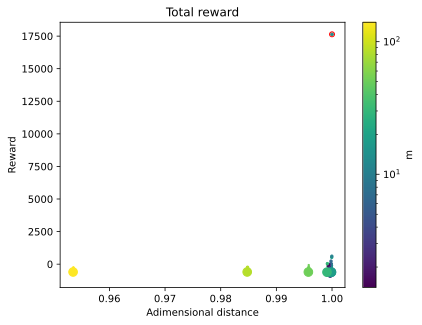

In [15]:
viz_df = score_df.sort_values(["adimensional_distance_to_original"])

viz_df.plot.scatter(
    x="cosine_similarity_to_original",
    y="mean_total_reward",
    s=viz_df["L"]*15,
    c="m",
    xlabel="Adimensional distance",
    ylabel="Reward",
    title="Total reward",
    legend=False,
    # cmap="coolwarm",
    norm="log", #colors.CenteredNorm(vcenter=original_context.value("m"))
    # logx=True,
)
plt.scatter(1, score_df.loc["original"]["mean_total_reward"], marker="o", s=25, facecolor="none", edgecolors="r")

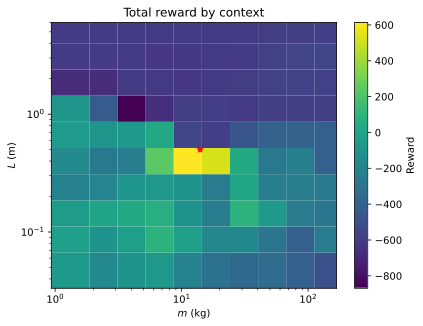

In [25]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward",
    title="Total reward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

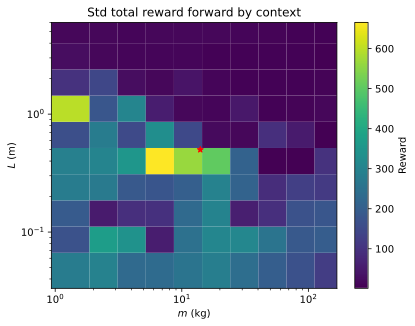

In [17]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "std_total_reward",
    title="Std total reward forward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

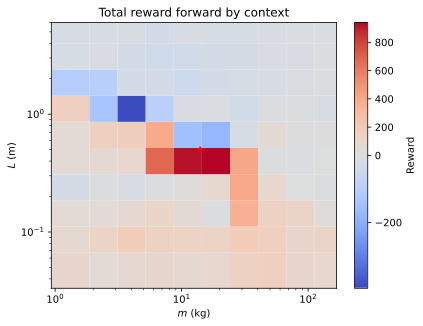

In [27]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward_forward",
    title="Total reward forward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm="linear",
    norm=colors.TwoSlopeNorm(0), #"linear",
    cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

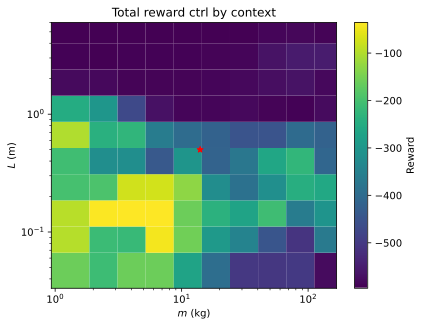

In [19]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward_ctrl",
    title="Total reward ctrl by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

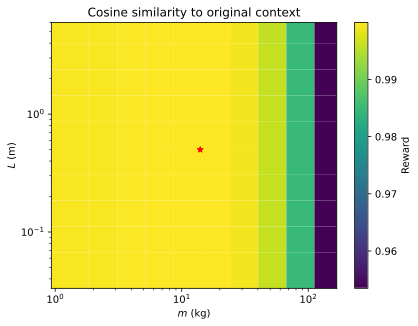

In [20]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "cosine_similarity_to_original",
    title="Cosine similarity to original context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

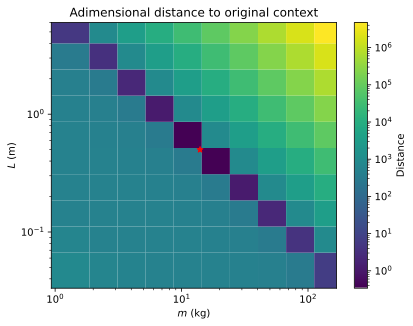

In [21]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "adimensional_distance_to_original",
    title="Adimensional distance to original context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Distance",
    norm="log",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")